In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
poverty=pd.read_csv(r'C:\Users\rutuj\OneDrive\Documents\Northeastern University MS in Data Analytics Engineering\5. Computation & Visualization\Project 1\PovertyPercentage_2022.csv')
happ_score=pd.read_excel(r'C:\Users\rutuj\OneDrive\Documents\Northeastern University MS in Data Analytics Engineering\5. Computation & Visualization\Project 1\2021_Happiness_IndexData.xls')
gdp=pd.read_excel(r'C:\Users\rutuj\OneDrive\Documents\Northeastern University MS in Data Analytics Engineering\5. Computation & Visualization\Project 1\GDP_Breakdown.xlsx')

In [41]:
poverty.head()

,country,percPoverty,dataYear,lessThan10,lessThan550
0,Equatorial Guinea,76.8,2006,NaN,NaN
1,South Sudan,76.4,2016,99.70,98.44
2,Madagascar,70.7,2012,99.41,97.09
3,Guinea-Bissau,69.3,2010,96.56,92.21
4,Eritrea,69.0,1993,NaN,NaN


In [42]:
happ_score.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


In [52]:
gdp.dropna(inplace=True)
gdp.shape
gdp.head()

,Country,GDP,Agriculture % of GDP,Industry % of GDP,Manufacturing % GDP,Service % of GDP
0,Afghanistan,20.1,26.8,14.0,7.7,54.7
1,Albania,14.9,19.1,20.1,6.2,48.4
2,Algeria,145.0,14.1,20.3,18.8,48.7
5,Angola,58.4,9.5,45.9,6.8,39.6
6,Antigua and Barbuda,1.4,2.2,21.1,2.4,65.3


In [62]:
final_gdp=pd.merge(gdp,happ_score[['Country name','Regional indicator','Ladder score']],left_on='Country',right_on='Country name',how='inner')
final_gdp.head()                       
#final_gdp.shape

,Country,GDP,Agriculture % of GDP,Industry % of GDP,Manufacturing % GDP,Service % of GDP,Country name,Regional indicator,Ladder score
0,Afghanistan,20.1,26.8,14.0,7.7,54.7,Afghanistan,South Asia,2.5229
1,Albania,14.9,19.1,20.1,6.2,48.4,Albania,Central and Eastern Europe,5.1174
2,Algeria,145.0,14.1,20.3,18.8,48.7,Algeria,North Africa,4.8871
3,Argentina,389.3,5.9,23.3,15.4,54.6,Argentina,Latin America and Caribbean,5.9293
4,Armenia,12.6,11.2,27.1,12.4,53.2,Armenia,Commonwealth of Independent States,5.2826


In [63]:
final_gdp=final_gdp[['Country','Regional indicator','GDP','Agriculture % of GDP','Industry % of GDP','Manufacturing % GDP','Service % of GDP','Ladder score']]

In [69]:
final_gdp.rename(columns={'Ladder score':'Happiness Score'},inplace=True)
final_gdp.head()
final_gdp.to_csv(r'C:\Users\rutuj\OneDrive\Documents\Northeastern University MS in Data Analytics Engineering\5. Computation & Visualization\Project 1\GDP_Breakdown_HappScore.csv')

In [44]:
final=pd.merge(happ_score[['Country name','Regional indicator','Ladder score']],poverty[['country','percPoverty']],left_on='Country name',right_on='country',how='inner')

In [45]:
final.head()

,Country name,Regional indicator,Ladder score,country,percPoverty
0,Finland,Western Europe,7.8421,Finland,12.2
1,Denmark,Western Europe,7.6195,Denmark,12.5
2,Switzerland,Western Europe,7.5715,Switzerland,16.0
3,Iceland,Western Europe,7.5539,Iceland,8.8
4,Netherlands,Western Europe,7.4640,Netherlands,13.6


In [46]:
final.dropna(inplace=True)
final.shape

(131, 5)

In [47]:
final.sort_values(['percPoverty'],ascending=False)


,Country name,Regional indicator,Ladder score,country,percPoverty
121,Madagascar,Sub-Saharan Africa,4.2085,Madagascar,70.7
126,Burundi,Sub-Saharan Africa,3.7753,Burundi,64.9
25,Guatemala,Latin America and Caribbean,6.4345,Guatemala,59.3
129,Haiti,Latin America and Caribbean,3.6149,Haiti,58.5
124,Sierra Leone,Sub-Saharan Africa,3.8494,Sierra Leone,56.8
...,...,...,...,...,...
94,Morocco,North Africa,4.9180,Morocco,4.8
38,Kazakhstan,Commonwealth of Independent States,6.1518,Kazakhstan,4.3
116,Sri Lanka,South Asia,4.3250,Sri Lanka,4.1
98,Ukraine,Commonwealth of Independent States,4.8748,Ukraine,1.1


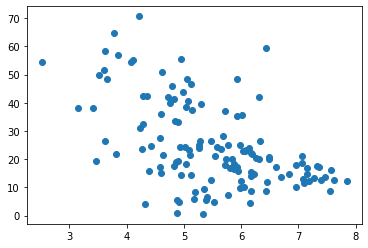

In [34]:
plt.scatter(final['Ladder score'],final['percPoverty'])

In [35]:
final.to_csv(r'C:\Users\rutuj\OneDrive\Documents\Northeastern University MS in Data Analytics Engineering\5. Computation & Visualization\Project 1\povertyVsHappinessScore.csv')